In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
col_names=["tweet id","entity","sentiment","tweet content"]

# Data cleaning

In [3]:
col_names=["tweet id","entity","sentiment","tweet content"]
df=pd.read_csv('twitter_training.csv',encoding='unicode_escape',names=col_names,header=None)
df.head()

,tweet id,entity,sentiment,tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [19]:
df.tail()

,tweet id,entity,sentiment,tweet content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [20]:
df.shape

(74682, 4)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet id       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [22]:
pd.isnull(df).sum()

tweet id           0
entity             0
sentiment          0
tweet content    686
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
pd.isnull(df).sum()

tweet id         0
entity           0
sentiment        0
tweet content    0
dtype: int64

In [25]:
df.shape

(73996, 4)

In [27]:
df_duplicate= df.duplicated().sum()
print(f'There are {df_duplicate} values')

There are 2341 values


In [28]:
df=df.drop_duplicates()
df.duplicated().sum()

0

# Expolatory Data Analysis

[Text(0.5, 1.0, 'Distribution of tweet content length')]

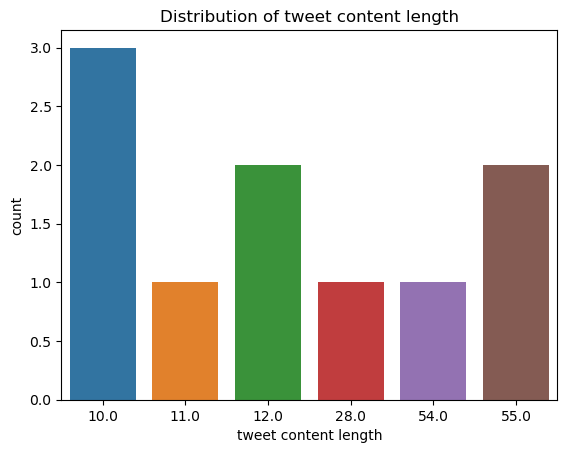

In [32]:
df["tweet content length"] = df["tweet content"].map(lambda x:len(x.split(" "))).head(10)
sns.countplot(x="tweet content length",data=df).set(title='Distribution of tweet content length')

This bar chart shows the length of content of tweet of first 10 tweet.

<AxesSubplot:xlabel='sentiment', ylabel='count'>

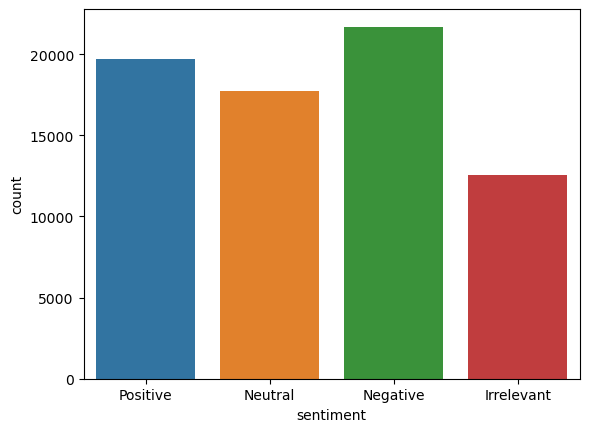

In [33]:
sns.countplot(x='sentiment', data=df)

This bar chart shows that most of the people has negative sentiment.

Text(0.5, 1.0, 'Frequency of entity')

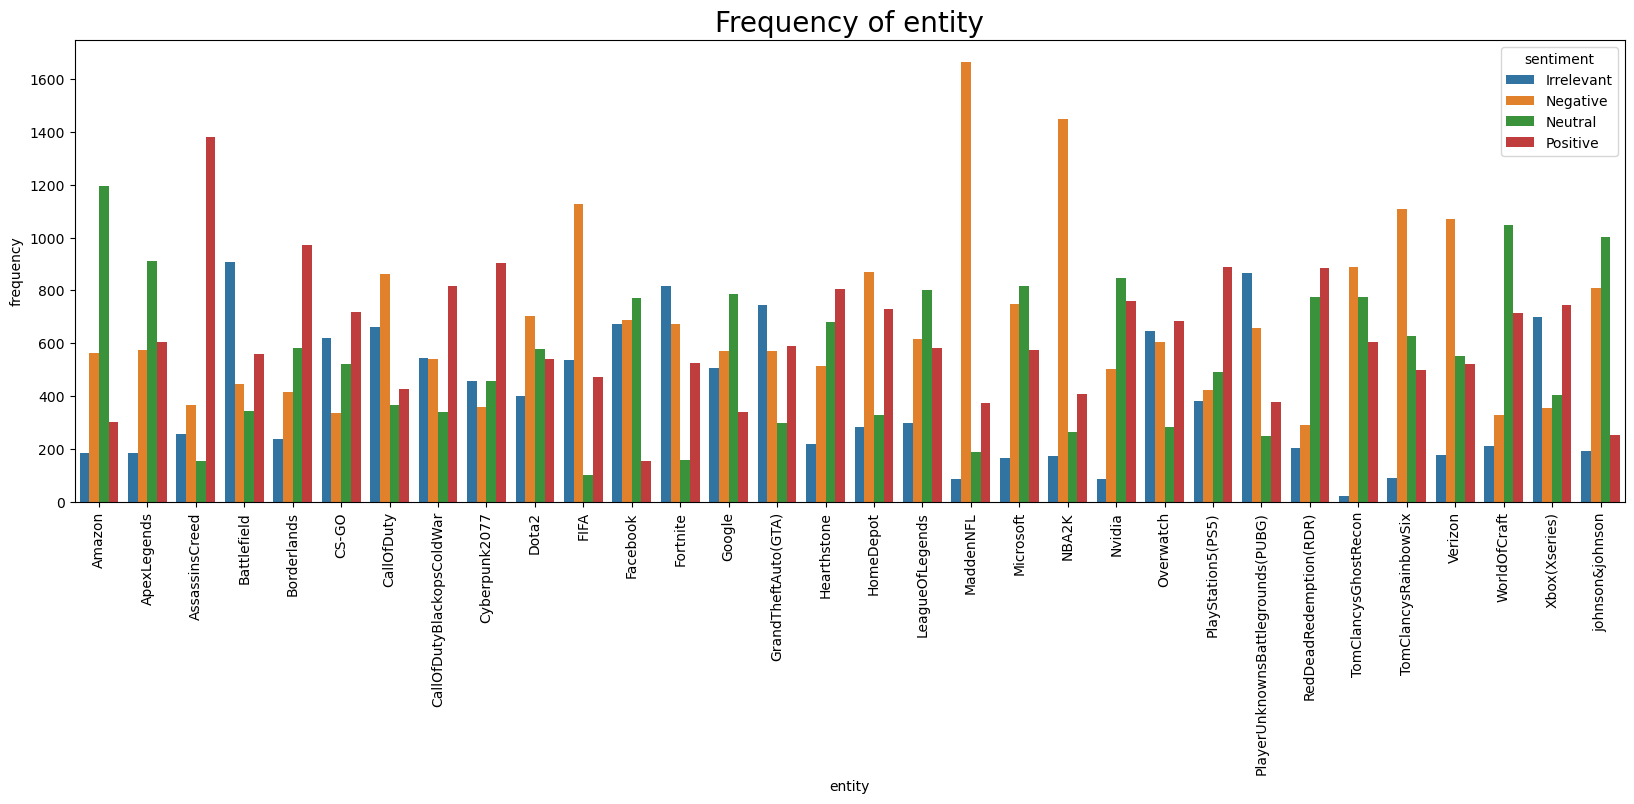

In [36]:
entity_frequency = df.groupby(["sentiment","entity"]).size().reset_index()
entity_frequency.rename(columns={0: 'frequency'}, inplace=True)

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(data=entity_frequency,x="entity",y="frequency",hue="sentiment").set_title("Frequency of entity", fontsize=20)

This bar graph show the sentiments of every entity

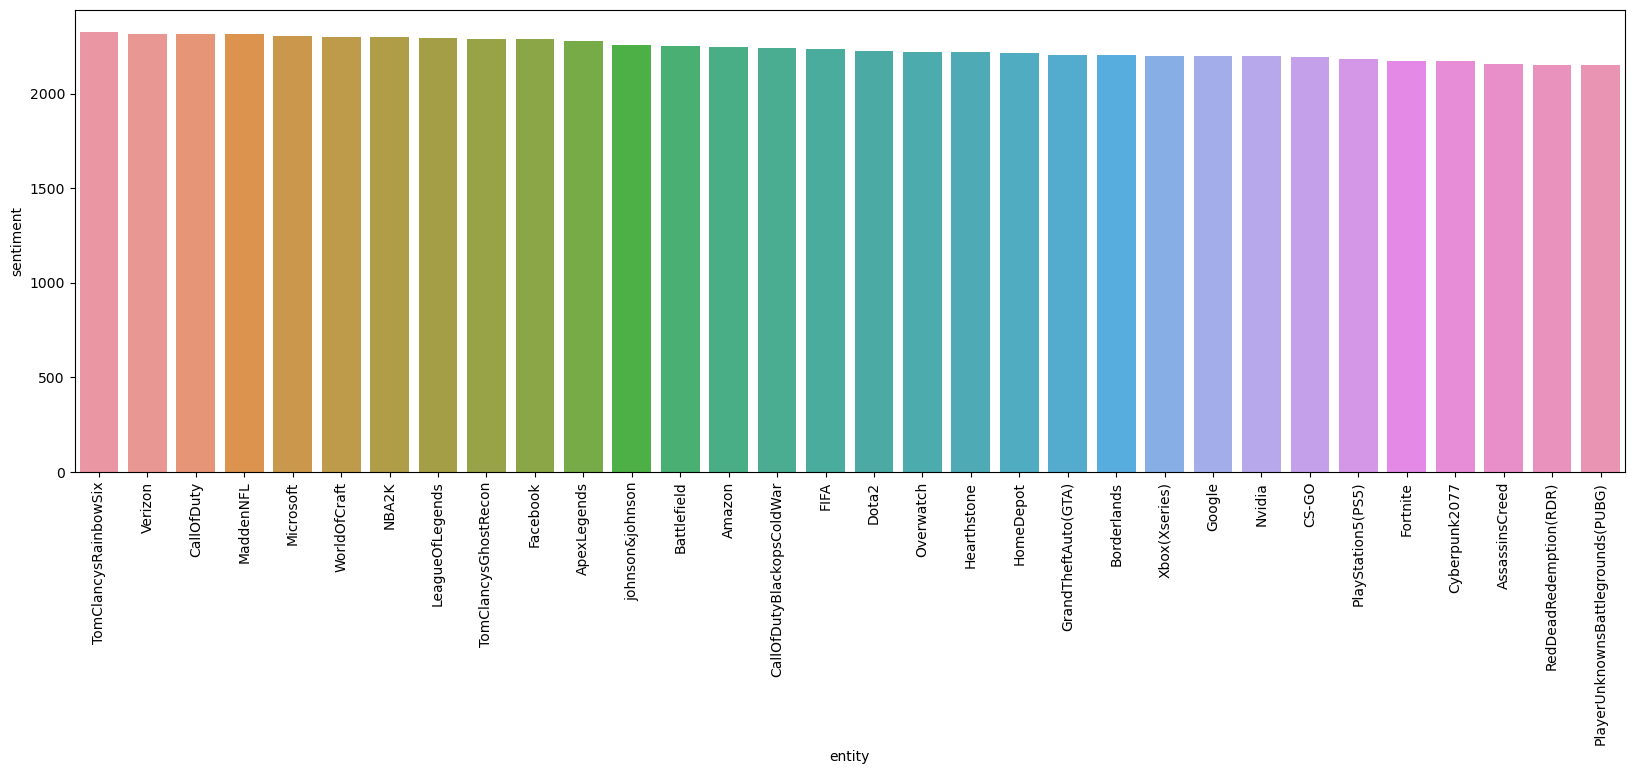

In [41]:
b = df.groupby(['entity'], as_index=False)['sentiment'].count().sort_values(by='sentiment', ascending=False)
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x = 'entity',y= 'sentiment' ,data = b)
plt.show()

 This bar graph show the number of sentiment of every entity

In [4]:
df['sentiment'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: sentiment, dtype: int64

In [5]:
df['entity'].value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               